### Clustering Data BBRI.JK
---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv("BBRI.JK.csv")
df = df.drop(['Adj Close', 'Volume'], axis=1)
df

,Date,Open,High,Low,Close
0,2020-11-01,3360.000000,4390.0,3290.000000,4090.000000
1,2020-12-01,4130.000000,4450.0,3950.000000,4170.000000
2,2021-01-01,4170.000000,4950.0,4150.000000,4180.000000
3,2021-02-01,4180.000000,4870.0,3960.000000,4710.000000
4,2021-03-01,4800.000000,4880.0,4260.000000,4400.000000
5,2021-04-01,4350.000000,4460.0,4050.000000,4050.000000
6,2021-05-01,4060.000000,4280.0,3820.000000,4260.000000
7,2021-06-01,4350.000000,4390.0,3860.000000,3940.000000
8,2021-07-01,3940.000000,4030.0,3700.000000,3710.000000
9,2021-08-01,3770.000000,4090.0,3481.758057,3572.665527


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13 non-null     object 
 1   Open    13 non-null     float64
 2   High    13 non-null     float64
 3   Low     13 non-null     float64
 4   Close   13 non-null     float64
dtypes: float64(4), object(1)
memory usage: 648.0+ bytes


In [27]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [28]:
df.describe()

,Open,High,Low,Close
count,13.000000,13.000000,13.000000,13.000000
mean,4066.358887,4420.769231,3841.179575,4103.281964
std,375.240948,326.533856,290.762491,295.217663
min,3360.000000,3880.000000,3290.000000,3572.665527
25%,3850.000000,4280.000000,3700.000000,3940.000000
50%,4130.000000,4390.000000,3860.000000,4160.000000
75%,4330.000000,4460.000000,4050.000000,4250.000000
max,4800.000000,4950.000000,4260.000000,4710.000000


In [29]:
df.describe(include="all")

,Date,Open,High,Low,Close
count,13,13.000000,13.000000,13.000000,13.000000
unique,13,NaN,NaN,NaN,NaN
top,2021-03-01,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4066.358887,4420.769231,3841.179575,4103.281964
std,NaN,375.240948,326.533856,290.762491,295.217663
min,NaN,3360.000000,3880.000000,3290.000000,3572.665527
25%,NaN,3850.000000,4280.000000,3700.000000,3940.000000
50%,NaN,4130.000000,4390.000000,3860.000000,4160.000000
75%,NaN,4330.000000,4460.000000,4050.000000,4250.000000


In [30]:
df.mean()

Open     4066.358887
High     4420.769231
Low      3841.179575
Close    4103.281964
dtype: float64

In [31]:
df.sum()

Date     2020-11-012020-12-012021-01-012021-02-012021-0...
Open                                          52862.665527
High                                               57470.0
Low                                           49935.334473
Close                                         53342.665527
dtype: object

In [32]:
df.median()

Open     4130.0
High     4390.0
Low      3860.0
Close    4160.0
dtype: float64

In [33]:
df.max()

Date     2021-11-01
Open         4800.0
High         4950.0
Low          4260.0
Close        4710.0
dtype: object

In [34]:
df.min()

Date      2020-11-01
Open          3360.0
High          3880.0
Low           3290.0
Close    3572.665527
dtype: object

In [35]:
df.var()

Open     140805.768988
High     106624.358974
Low       84542.826346
Close     87153.468309
dtype: float64

In [36]:
df.std()

Open     375.240948
High     326.533856
Low      290.762491
Close    295.217663
dtype: float64

In [37]:
df.corr(method='pearson')

,Open,High,Low,Close
Open,1.000000,0.581017,0.916874,0.422008
High,0.581017,1.000000,0.697936,0.778009
Low,0.916874,0.697936,1.000000,0.556443
Close,0.422008,0.778009,0.556443,1.000000


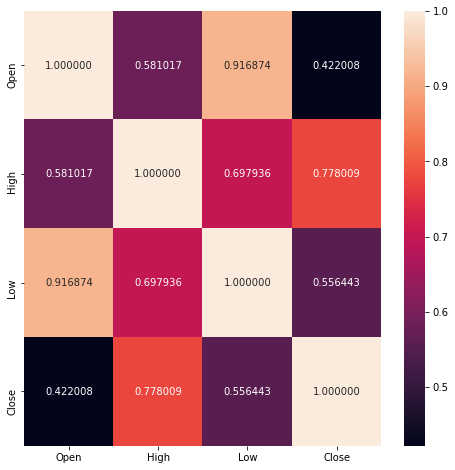

In [38]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,fmt="f")
plt.show()

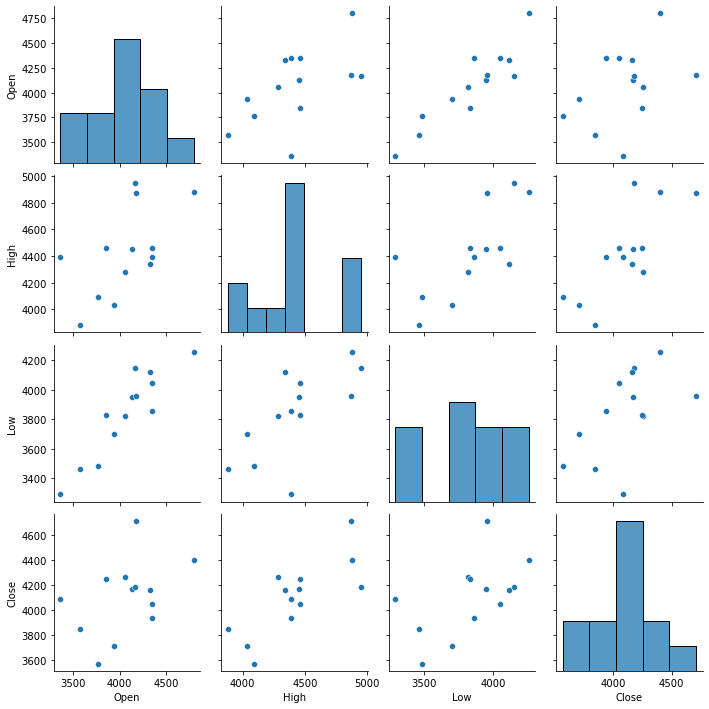

In [39]:
sns.pairplot(data=df,kind='scatter')

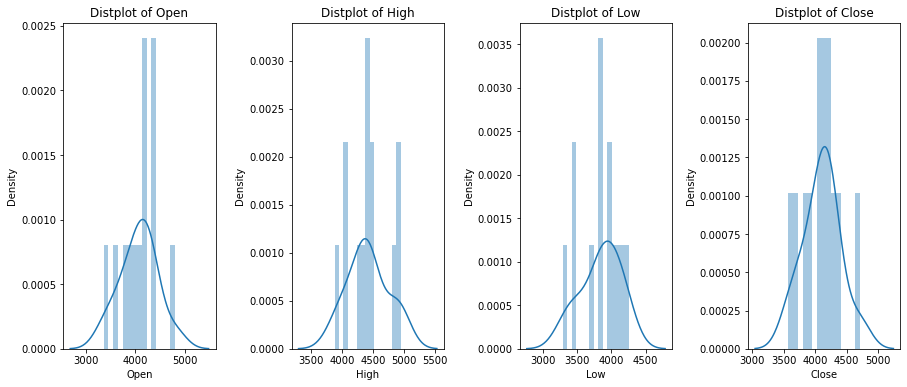

In [42]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Open' , 'High' , 'Low', 'Close']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

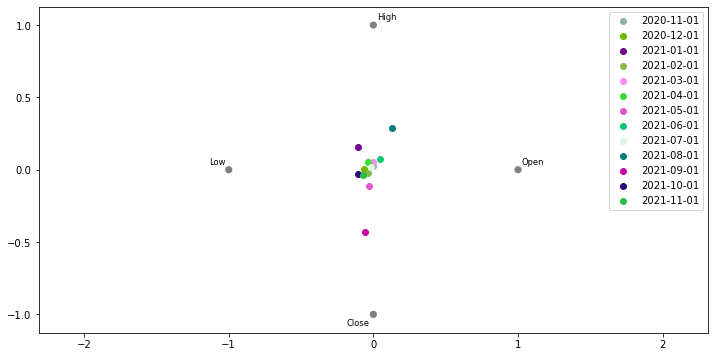

In [78]:
from pandas.plotting import radviz  
plt.figure(1 , figsize = (12, 6))
radviz(df, "Date") 
plt.show()

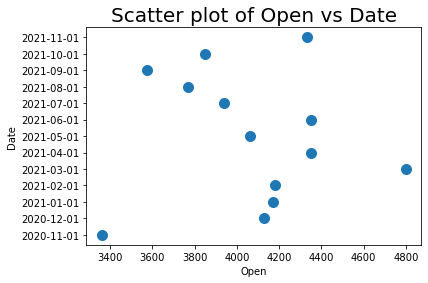

In [124]:
plt.figure(1 , figsize = (6, 4))
plt.title('Scatter plot of Open vs Date', fontsize = 20)
plt.xlabel('Open')
plt.ylabel('Date')
plt.scatter( x = 'Open', y = 'Date', data = df, s = 100)
plt.show()

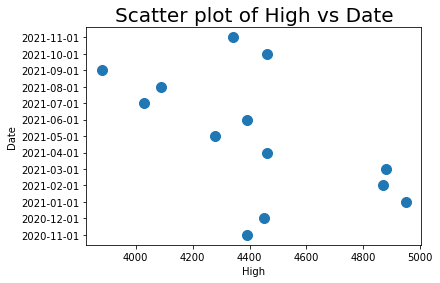

In [125]:
plt.figure(1 , figsize = (6, 4))
plt.title('Scatter plot of High vs Date', fontsize = 20)
plt.xlabel('High')
plt.ylabel('Date')
plt.scatter( x = 'High', y = 'Date', data = df, s = 100)
plt.show()

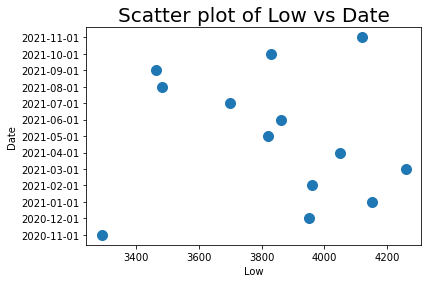

In [126]:
plt.figure(1 , figsize = (6 , 4))
plt.title('Scatter plot of Low vs Date', fontsize = 20)
plt.xlabel('Low')
plt.ylabel('Date')
plt.scatter( x = 'Low', y = 'Date', data = df, s = 100)
plt.show()

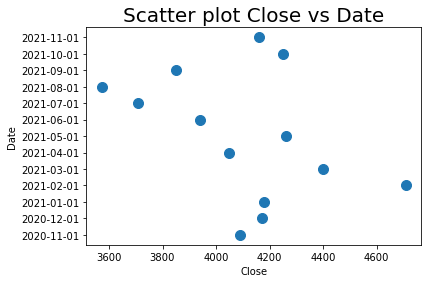

In [127]:
plt.figure(1 , figsize = (6, 4))
plt.title('Scatter plot Close vs Date', fontsize = 20)
plt.xlabel('Close')
plt.ylabel('Date')
plt.scatter( x = 'Close', y = 'Date', data = df, s = 100)
plt.show()

---
### Clustering Open & Close
---

In [61]:
data = df.iloc[:, 1::3]
data.head()

,Open,Close
0,3360.0,4090.0
1,4130.0,4170.0
2,4170.0,4180.0
3,4180.0,4710.0
4,4800.0,4400.0


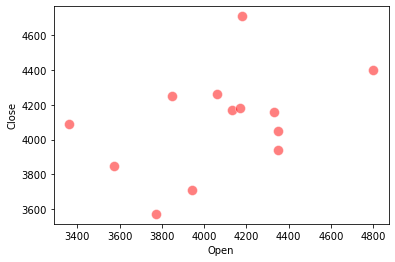

In [62]:
sns.scatterplot(x="Open", y="Close", data=data, s=100, color="red", alpha = 0.5)
plt.show()

In [63]:
x_array = np.array(data)
print(x_array)

[[3360.       4090.      ]
 [4130.       4170.      ]
 [4170.       4180.      ]
 [4180.       4710.      ]
 [4800.       4400.      ]
 [4350.       4050.      ]
 [4060.       4260.      ]
 [4350.       3940.      ]
 [3940.       3710.      ]
 [3770.       3572.665527]
 [3572.665527 3850.      ]
 [3850.       4250.      ]
 [4330.       4160.      ]]


In [64]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.45486573],
       [0.53472222, 0.52520563],
       [0.5625    , 0.53399812],
       [0.56944444, 1.        ],
       [1.        , 0.72743286],
       [0.6875    , 0.41969577],
       [0.48611111, 0.60433803],
       [0.6875    , 0.3229784 ],
       [0.40277778, 0.12075117],
       [0.28472222, 0.        ],
       [0.14768439, 0.24384601],
       [0.34027778, 0.59554554],
       [0.67361111, 0.51641315]])

In [65]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [66]:
print(kmeans.cluster_centers_)

[[0.2087961  0.20486573]
 [0.56746032 0.50259638]
 [0.78472222 0.86371643]]


In [67]:
data["Cluster"] = kmeans.labels_
data.head()

,Open,Close,Cluster
0,3360.0,4090.0,0
1,4130.0,4170.0,1
2,4170.0,4180.0,1
3,4180.0,4710.0,2
4,4800.0,4400.0,2


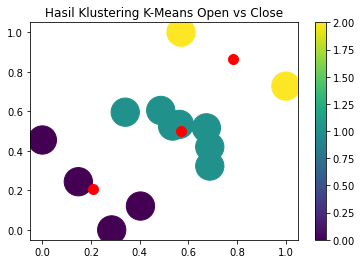

In [68]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s =800, c = data.Cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means Open vs Close")
plt.colorbar (output)
plt.show()

---
### Clustering High & Low
---

In [69]:
data = df.iloc[:, 2:4]
data.head()

,High,Low
0,4390.0,3290.0
1,4450.0,3950.0
2,4950.0,4150.0
3,4870.0,3960.0
4,4880.0,4260.0


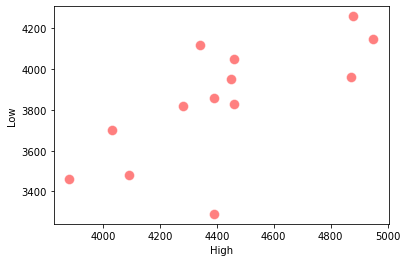

In [70]:
sns.scatterplot(x="High", y="Low", data=data, s=100, color="red", alpha = 0.5)
plt.show()

In [71]:
x_array = np.array(data)
print(x_array)

[[4390.       3290.      ]
 [4450.       3950.      ]
 [4950.       4150.      ]
 [4870.       3960.      ]
 [4880.       4260.      ]
 [4460.       4050.      ]
 [4280.       3820.      ]
 [4390.       3860.      ]
 [4030.       3700.      ]
 [4090.       3481.758057]
 [3880.       3463.576416]
 [4460.       3830.      ]
 [4340.       4120.      ]]


In [72]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.47663551, 0.        ],
       [0.53271028, 0.68041237],
       [1.        , 0.88659794],
       [0.92523364, 0.69072165],
       [0.93457944, 1.        ],
       [0.54205607, 0.78350515],
       [0.37383178, 0.54639175],
       [0.47663551, 0.58762887],
       [0.14018692, 0.42268041],
       [0.19626168, 0.19768872],
       [0.        , 0.17894476],
       [0.54205607, 0.55670103],
       [0.42990654, 0.8556701 ]])

In [73]:
kmeans = KMeans(n_clusters = 4, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=4, random_state=123)

In [75]:
print(kmeans.cluster_centers_)

[[0.47663551 0.        ]
 [0.95327103 0.85910653]
 [0.48286604 0.66838488]
 [0.11214953 0.26643796]]


In [76]:
data["Cluster"] = kmeans.labels_
data.head()

,High,Low,Cluster
0,4390.0,3290.0,0
1,4450.0,3950.0,2
2,4950.0,4150.0,1
3,4870.0,3960.0,1
4,4880.0,4260.0,1


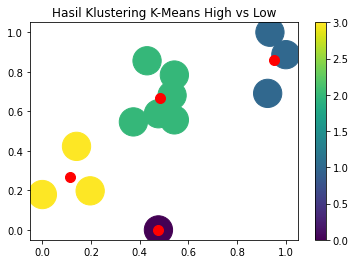

In [77]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s =800, c = data.Cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means High vs Low")
plt.colorbar (output)
plt.show()